# Intro to scikit-learn 
## Linear regression model
### Import the libraries and load the dataset
The dataset is taken from [kaggle](https://www.kaggle.com/jessicali9530/honey-production)

It is about the honey production in the USA, and show how it is decreasing in the latest years.

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
# Load the dataset
url = 'https://raw.githubusercontent.com/ricardopretelt/Intro-to-python-libraries/master/honeyproduction.csv'
df = pd.read_csv(url)
# To learn about the dataset we are going to analyze.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
state          626 non-null object
numcol         626 non-null float64
yieldpercol    626 non-null int64
totalprod      626 non-null float64
stocks         626 non-null float64
priceperlb     626 non-null float64
prodvalue      626 non-null float64
year           626 non-null int64
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB
None


In [2]:
# Preview of the dataset
print(df.head())

  state    numcol  yieldpercol  ...  priceperlb   prodvalue  year
0    AL   16000.0           71  ...        0.72    818000.0  1998
1    AZ   55000.0           60  ...        0.64   2112000.0  1998
2    AR   53000.0           65  ...        0.59   2033000.0  1998
3    CA  450000.0           83  ...        0.62  23157000.0  1998
4    CO   27000.0           72  ...        0.70   1361000.0  1998

[5 rows x 8 columns]


In [3]:
#To print the query with the production grouped by year
prod_per_year=df.groupby('year').totalprod.mean().reset_index()
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


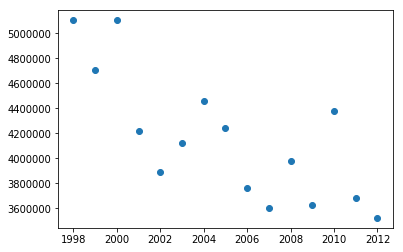

In [4]:
#Saving the years of production in the dataset in a different value X, also the production in Y
X= prod_per_year["year"]
Y=prod_per_year["totalprod"]
#Reshaping X
X = X.values.reshape(-1, 1)
#plotting
plt.scatter(X,Y)

In [5]:
#Creating the linear regression model in scikit-learn, and printing the parameters
regr = linear_model.LinearRegression()
regr.fit(X,Y)
print(regr.coef_[0])
print(regr.intercept_)

-88303.18915238192
181208083.10732976


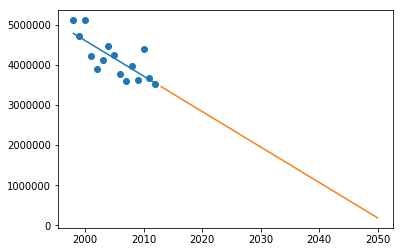

In [6]:
#Creating list that represent the future years until 2051
X_future=np.array(range(2013,2051))
X_future=X_future.reshape(-1,1)
#Predicting the production for the upcoming years and plotting
y_predict=regr.predict(X)
future_predict=regr.predict(X_future)
plt.scatter(X,Y)
plt.plot(X,y_predict)
plt.plot(X_future, future_predict)
plt.show()